

# Project: Investigating TMDb Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis and Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>
> We will be exploring a few things here like, which genres are most popular from year to year, what kinds of properties are associated with movies that have high revenues and which directors do high budget movies comparitively.

In [200]:
#import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

> Looking at the first few values of data, shape of data, data types of columns and checking if the data has any NA Values and duplicate values. Looking at the summary statistics of the data.

### General Properties

In [201]:
# Loading the data into a pandas data frame
df_moviedata = pd.read_csv('tmdb-movies.csv')
#Looking at first few rows of dataset
df_moviedata.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [202]:
#Looking at number of rows and columns of the data
df_moviedata.shape

(10866, 21)

In [203]:
df_moviedata.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [204]:
#Looking at the description of columns and number of non null values
df_moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Observations:
<ul>
    <li>There are lot of movies for which budget and revenue is 0</li>
    <li>There are some columns that are not useful</li>
    <li>The data types of all columns is not right</li>
</ul>

In [205]:
#looking at the summary statistics
df_moviedata.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [206]:
# check for duplicates in the data
sum(df_moviedata.duplicated())

1

In [207]:
# check for null values in the data
df_moviedata.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning:
> This will involve removing NA(replacing with mean), removing duplicates, changing datatypes Since the names of the columns are already as desired, we won't change them

> 1. Removing Duplicates:

In [208]:
# drop duplicates
df_moviedata.drop_duplicates(inplace=True)
# confirm correction by rechecking for duplicates in the data
sum(df_moviedata.duplicated())

0

> 2. Remove null values

In [209]:
#Drop null values and confirm if they have been removed 
df_moviedata.dropna(axis=0,how='any',inplace=True)
df_moviedata.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

> 3. Changing format of release date into datetime format

In [210]:
#changing data types of columns
df_moviedata["release_date"]= pd.to_datetime(df_moviedata["release_date"]) 
# confirm 
df_moviedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1992 non-null   int64         
 1   imdb_id               1992 non-null   object        
 2   popularity            1992 non-null   float64       
 3   budget                1992 non-null   int64         
 4   revenue               1992 non-null   int64         
 5   original_title        1992 non-null   object        
 6   cast                  1992 non-null   object        
 7   homepage              1992 non-null   object        
 8   director              1992 non-null   object        
 9   tagline               1992 non-null   object        
 10  keywords              1992 non-null   object        
 11  overview              1992 non-null   object        
 12  runtime               1992 non-null   int64         
 13  genres           

> 4. Remove unsued columns which are not needed in analysis process

In [211]:
df_moviedata.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)
print("After Removing Unused Columns (Rows,Columns) : ",df_moviedata.shape)

After Removing Unused Columns (Rows,Columns) :  (1992, 15)


<a id='eda'></a>
## Exploratory Data Analysis and Conclusions

> Here we will analyse the data by computing statistics and creating visualizations to get some useful insights

### Research Question 1 
#### Which year has the highest release of movies?

In [181]:
# make group for each year and count the number of movies in each year 
year_data=df_moviedata.groupby('release_year').count()['id']
print(year_data.tail())

release_year
2011    219
2012    145
2013    128
2014    153
2015    165
Name: id, dtype: int64


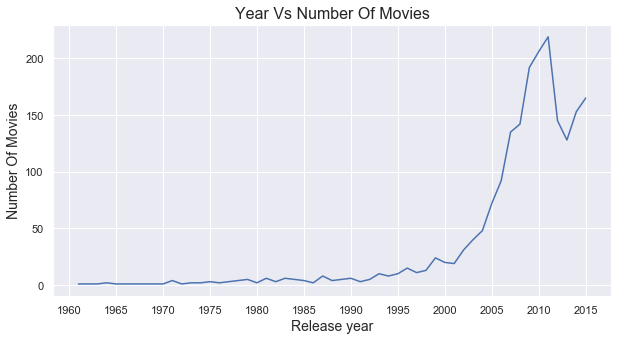

In [182]:
#make group of the data according to their release year and count the total number of movies in each year and pot.
year_data.plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 16)
plt.xlabel('Release year',fontsize = 14)
plt.ylabel('Number Of Movies',fontsize = 14)
#set the style sheet
sns.set_style("whitegrid")

### Observation:
> We can see that 2011 has the highest number of movie releases

### Research Question 2
#### Which movie has the highest or lowest profit?

In [184]:
#calculate Profit for each of the movie
#add a new column in the dataframe name 'Profit'
df_moviedata['Profit'] = df_moviedata['revenue'] - df_moviedata['budget']

In [186]:
#use the function 'idmin' to find the index of lowest profit movie.
#use the function 'idmax' to find the index of Highest profit movie.
#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df_moviedata[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df_moviedata[x].idxmax()
    high = pd.DataFrame(df_moviedata.loc[high_index,:])
    low = pd.DataFrame(df_moviedata.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df_moviedata['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df_moviedata['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Warrior's Way


,1386,2244
id,19995,46528
imdb_id,tt0499549,tt1032751
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage,http://www.avatarmovie.com/,http://www.iamrogue.com/thewarriorsway
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.


> The first column shows the highest profit movie and it's details and the second column shows the movie in greatest loss.
> 
> We can see that 'Avatar' movie directed by James Cameron is the movie which made highest profit and the movie which suffered the greatest loss is 'The Warrior's Way'

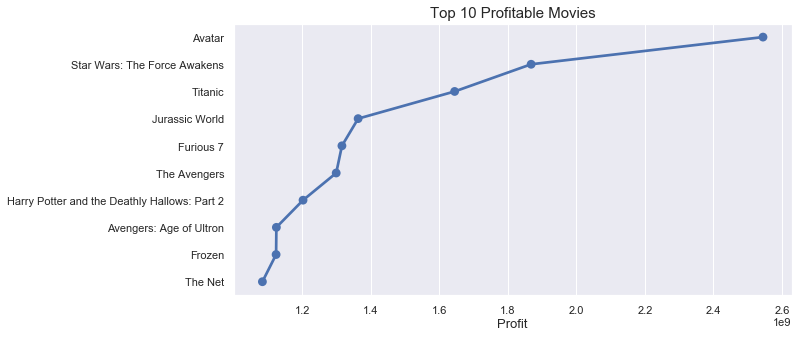

In [192]:
#make a plot which contain top 10 movies which earn highest profit.

#sort the 'Profit' column in decending order and store it in the new dataframe,
info = pd.DataFrame(df_moviedata['Profit'].sort_values(ascending = False))
info['original_title'] = df_moviedata['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profit'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

### Research Question 3
#### What are the movies with highest and lowest earned revenue?


In [193]:
#find the movie with highest and lowest earned revenue
#use 'find_minmax' function which was made earlier
find_minmax('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  Wild Card


,1386,48
id,19995,265208
imdb_id,tt0499549,tt2231253
popularity,9.43277,2.93234
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
homepage,http://www.avatarmovie.com/,NaN
director,James Cameron,Simon West
tagline,Enter the World of Pandora.,Never bet against a man with a killer hand.


> The first column shows the highest profit movie and it's details and the second column shows the movie in greatest loss.
> 
> We can see that 'Avatar' movie directed by James Cameron is the movie which made highest revenue and the movie which made lowest revenue is'Wild Card'

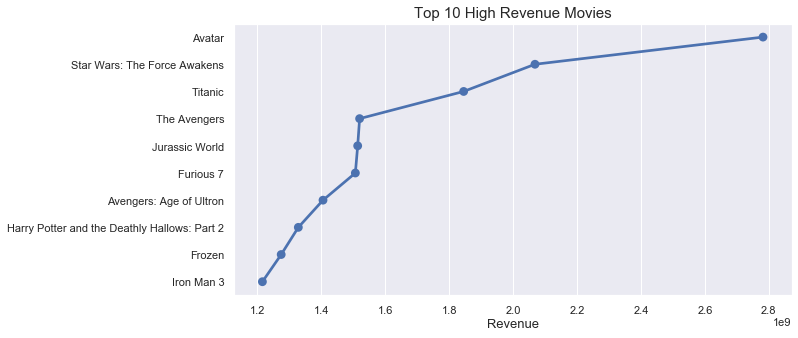

In [194]:
#sort the 'revenue' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df_moviedata['revenue'].sort_values(ascending = False))
info['original_title'] = df_moviedata['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 movies with high revenue data from the list and dataframe.
x = list(data[:10])
y = list(info['revenue'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")

### Research Question 4
#### How does popularity depend on profit?

Correlation Between Popularity And Profit :  0.6289906698448757


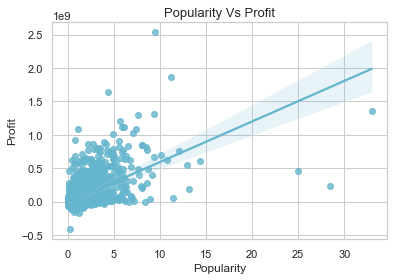

In [196]:
#make a scatter plot using 'regplot' between 'popularity' and 'profit'.
ax = sns.regplot(x=df_moviedata['popularity'],y=df_moviedata['Profit'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Popularity Vs Profit",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

#find correlation using corr() function
data_corr = df_moviedata.corr()

#find the correlation between them.
print("Correlation Between Popularity And Profit : ",data_corr.loc['popularity','Profit'])

> Poularity and profit have positive correlation(~0.63). It means movie with high popularity tends to earn higher profit

### Research Question 5
#### Which month released highest number of movies and which month made the highest revenue?

In [215]:
#extract the month number from the release date.
month_release = df_moviedata['release_date'].dt.month

#count the movies in each month using value_counts().
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months
#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

number_of_release

,number_of_release,month
1,149,Jan
2,122,Feb
3,151,Mar
4,137,Apr
5,158,May
6,157,Jun
7,153,Jul
8,153,Aug
9,290,Sep
10,201,Oct


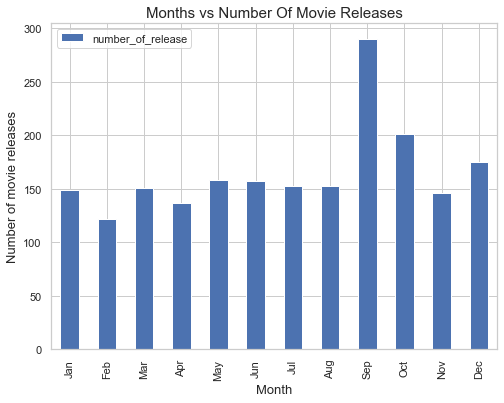

In [216]:
#plot the bar graph using plot.
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")

> We can see that according to the plot there are higher number of releases in September and October

In [221]:
#which month made the highest average revenue?.
#make a dataframe with in which store the release month of each movie.
month_release = pd.DataFrame(month_release)
month_release

,release_month
0,6
1,5
2,3
3,12
4,4
...,...
10724,12
10759,10
10760,7
10817,5


In [223]:
#add a new column 'revenue' in the dataframe 'month_release'.
month_release['revenue'] = df_moviedata['revenue']

#make the group of the data according to their month and calculate the mean revenue of each month.
mean_revenue  = month_release.groupby('release_month').mean()
mean_revenue['month'] = months
mean_revenue

,revenue,month
release_month,,
1,4.742281e+07,Jan
2,6.960838e+07,Feb
3,1.201290e+08,Mar
4,1.166661e+08,Apr
5,1.907403e+08,May
6,2.047474e+08,Jun
7,1.455588e+08,Jul
8,6.655655e+07,Aug
9,4.561579e+07,Sep


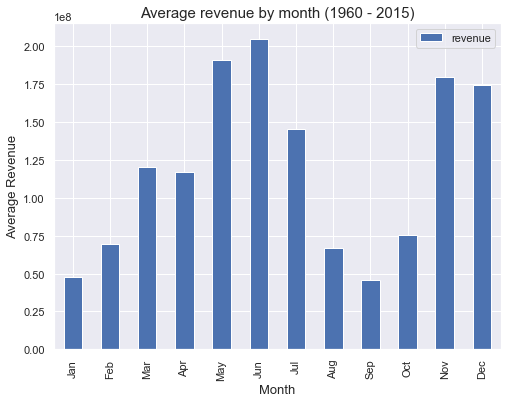

In [224]:
#make the bar plot using pandas plot function.
mean_revenue.plot(x='month',kind='bar',figsize = (8,6),fontsize=11)

#setup the title and lables of the plot.
plt.title('Average revenue by month (1960 - 2015)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13)
sns.set_style("darkgrid")

> We can see that according to the plot, movies which release in may or june made the highest profit in comparison to other months or it maybe because of outliers

### Limitations:
> It is not 100% guaranteed that all the insights drawn here are absolutely correct. There may exist many other factors to be taken care of.